In [1]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

# Load data

In [2]:
df = pd.read_csv('1-to-1 Fit and Endpoint Streptavidin scrubbed.csv',
                 na_values = '', keep_default_na = False)

df['Chunk'] = np.repeat([0, 1, 2], 1508)

columns = ['Chunk',
           'Set',
           'Label',
           'Error Code',
           'kon  [1/ (sec.nM)]',
           'Err',
           'koff  [1/sec]',
           'Err.1',
           'Kd  [nM]',
           'Err.2',
           'ThetaBar',
           'Err.3',
           'Scale',
           'Err.4',
           'RMSE Curve',
           'koff_max  [1/sec]',
           'Kd_max  [nM]',
           'koff_best  [1/sec]',
           'Kd_best  [nM]',
           'Assoc SNR',
           'Assoc Signal',
           'Baseline Noise']

df = df[columns]

rename = {'Chunk'              : 'Chunk',
          'Set'                : 'Set',
          'Label'              : 'Peptide',
          'Error Code'         : 'Fit Error',
          'kon  [1/ (sec.nM)]' : 'kon',
          'Err'                : 'kon Err',
          'koff  [1/sec]'      : 'koff',
          'Err.1'              : 'koff Err',
          'Kd  [nM]'           : 'Kd',
          'Err.2'              : 'Kd Err',
          'ThetaBar'           : 'Theta Bar',
          'Err.3'              : 'Theta Bar Err',
          'Scale'              : 'Scale',
          'Err.4'              : 'Scale Err',
          'RMSE Curve'         : 'Fit RMSE',
          'koff_max  [1/sec]'  : 'koff max',
          'Kd_max  [nM]'       : 'Kd max',
          'koff_best  [1/sec]' : 'koff best',
          'Kd_best  [nM]'      : 'Kd best',
          'Assoc SNR'          : 'Assoc SNR',
          'Assoc Signal'       : 'Assoc Signal',
          'Baseline Noise'     : 'Baseline Noise'}

df = df.rename(columns = rename)

# remove curves that were scrubbed out
df.dropna(axis = 0, subset = ['Peptide'], inplace = True)

df_reacted = df

In [3]:
df.head()

,Chunk,Set,Peptide,Fit Error,kon,kon Err,koff,koff Err,Kd,Kd Err,...,Scale,Scale Err,Fit RMSE,koff max,Kd max,koff best,Kd best,Assoc SNR,Assoc Signal,Baseline Noise
0,0,0,WTHPQFAT,0,0.000006,3.280000e-06,3.790000e-05,0.000007,5.98000,3.28,...,0.001290,0.000030,0.000500,0.000008,1.3100,3.790000e-05,5.98000,7.130,0.001500,0.000211
1,0,1,WTHPQFAT,0,0.000022,1.640000e-05,4.160000e-05,0.000006,1.90000,1.44,...,0.001030,0.000020,0.000344,0.000007,0.3250,4.160000e-05,1.90000,3.430,0.000903,0.000263
2,0,2,WTHLQFAT,0,0.000051,1.200000e-03,3.460000e-07,0.000226,0.00682,4.45,...,-0.000076,0.000020,0.000343,-0.000097,-1.9000,3.460000e-07,0.00682,-0.280,-0.000066,0.000237
3,0,3,NGQFQVWIPLAQK,0,0.003890,1.540000e+01,2.610000e-05,0.000055,0.00672,26.70,...,-0.000108,0.000020,0.000350,-0.000069,-0.0178,2.610000e-05,0.00672,-0.504,-0.000120,0.000237
4,0,4,LQLHPQAGK,0,0.000002,8.590000e-07,7.500000e-05,0.000013,47.30000,26.90,...,0.000566,0.000024,0.000336,0.000013,7.9700,7.500000e-05,47.30000,2.690,0.000639,0.000237


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 4523
Data columns (total 22 columns):
Chunk             3498 non-null int64
Set               3498 non-null int64
Peptide           3498 non-null object
Fit Error         3498 non-null int64
kon               3498 non-null float64
kon Err           3498 non-null float64
koff              3498 non-null float64
koff Err          3498 non-null float64
Kd                3498 non-null float64
Kd Err            3498 non-null float64
Theta Bar         3498 non-null float64
Theta Bar Err     3498 non-null float64
Scale             3498 non-null float64
Scale Err         3498 non-null float64
Fit RMSE          3498 non-null float64
koff max          3498 non-null float64
Kd max            3498 non-null float64
koff best         3498 non-null float64
Kd best           3498 non-null float64
Assoc SNR         3498 non-null float64
Assoc Signal      3498 non-null float64
Baseline Noise    3498 non-null float64
dtypes: float64(18),

## Filtering out non-reactive curves
### Throw away all fits with errors: 

In [5]:
df_reacted = df_reacted[df_reacted['Fit Error'] == 0]

### Keep only curves with SNR > SNR_threshold:

In [6]:
SNR_threshold = 2
df_reacted = df_reacted[df_reacted['Assoc SNR'] > SNR_threshold]

### Keep only fits with non-negative Scale

In [7]:
df_reacted = df_reacted[df_reacted['Scale'] >= 0]

### Add a reaction indicator to all peptide data

In [8]:
df['Reaction'] = df.index.isin(df_reacted.index).astype(int)

# Data inspection
## Endpoint parameters
### Distribution of Association Signal

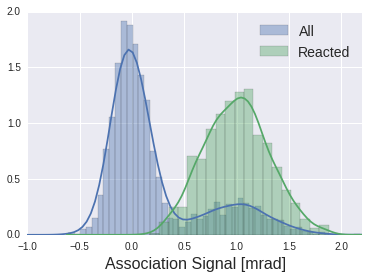

In [9]:
sns.distplot(df['Assoc Signal'] * 1000, label = 'All')
sns.distplot(df_reacted['Assoc Signal'] * 1000, label = 'Reacted')
plt.xlim(-1, 2.2)
plt.xlabel('Association Signal [mrad]', fontsize = 16)
plt.legend(fontsize = 14)

### Distribution of Association SNR

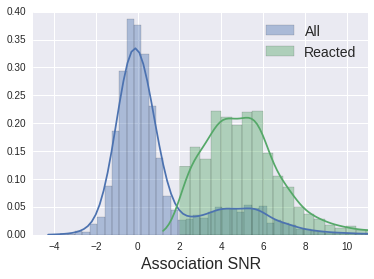

In [10]:
sns.distplot(df['Assoc SNR'], label = 'All')
sns.distplot(df_reacted['Assoc SNR'], label = 'Reacted')
plt.xlim(-5, 11)
plt.xlabel('Association SNR', fontsize = 16)
plt.legend(fontsize = 14)

## Fit Parameters
### How many fit errors?

In [11]:
print 'All:\n', sum(df['Fit Error'] != 0), 'fit errors among', len(df), 'fits.\n' 
print 'Reacted:\n', sum(df_reacted['Fit Error'] != 0), 'fit errors among', len(df_reacted), 'fits.\n' 

All:
97 fit errors among 3498 fits.

Reacted:
0 fit errors among 772 fits.



### How many times Kd_max was chosen over Kd?

In [12]:
print 'All:\nIn', sum(df['Kd best'] > df['Kd']), 'cases out of', len(df), 'Kd was replaced by Kd max.\n'
print 'Reacted:\nIn', sum(df_reacted['Kd best'] > df_reacted['Kd']), \
      'cases out of', len(df_reacted), 'Kd was replaced by Kd max.\n'

All:
In 1017 cases out of 3498 Kd was replaced by Kd max.

Reacted:
In 119 cases out of 772 Kd was replaced by Kd max.



### Distribution of Fit RMSE

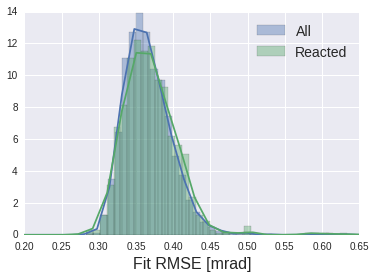

In [13]:
sns.distplot(df['Fit RMSE']*1000, label = 'All')
sns.distplot(df_reacted['Fit RMSE']*1000, label = 'Reacted')
plt.xlim(0.2, 0.65)
plt.xlabel('Fit RMSE [mrad]', fontsize = 16)
plt.legend(fontsize = 14)

In [14]:
print 'All:\nMaximum RMSE is', max(df['Fit RMSE']) * 1000, 'mrad.\n'

print 'Reacted:\nMaximum RMSE is', max(df_reacted['Fit RMSE']) * 1000, 'mrad.'
print 'There are', sum(df_reacted['Fit RMSE'] > 0.0005), 'peptides with fit RMSE > 0.5 mrad.'
df_reacted[df_reacted['Fit RMSE'] > 0.0005][['Chunk', 'Set', 'Peptide', 'Fit RMSE', 'Assoc SNR']]

All:
Maximum RMSE is 0.763 mrad.

Reacted:
Maximum RMSE is 0.633 mrad.
There are 5 peptides with fit RMSE > 0.5 mrad.


,Chunk,Set,Peptide,Fit RMSE,Assoc SNR
545,0,545,WTHPQSAT,0.000580,2.42
800,0,800,WTHPQFAA,0.000633,3.67
1068,0,1068,LQWHPQASK,0.000589,3.63
2543,1,1035,WTHPQFYT,0.000504,10.20
3409,2,393,WYHPQFAT,0.000607,7.64


### Distribution of fit parameter 'Scale'

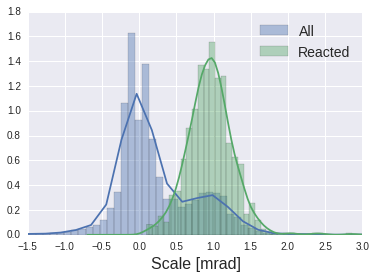

In [15]:
sns.distplot(df['Scale'] * 1000, bins = 200, label = 'All')
sns.distplot(df_reacted['Scale'] * 1000, label = 'Reacted')
plt.xlim(-1.5, 3)
plt.xlabel('Scale [mrad]', fontsize = 16)
plt.legend(fontsize = 14)

# Distribution of $K_d^{\text{(best)}}$

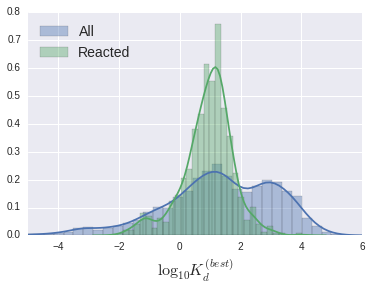

In [16]:
sns.distplot(np.log10(df['Kd best']), label = 'All')
sns.distplot(np.log10(df_reacted['Kd best']), label = 'Reacted')
plt.xlim(-5, 6)
plt.xlabel('$\log_{10}{K_d^{(best)}}$', fontsize = 16)
plt.legend(fontsize = 14, loc = 2)

In [17]:
print sum(df_reacted['Peptide'].str.contains('HPQ')), 'out of', \
      len(df_reacted), 'reacted peptides contain HPQ sequence.\n'
    
print sum(df_reacted['Peptide'].str.contains('HPM')), 'out of', \
      len(df_reacted), 'reacted peptides contain HPM sequence.\n'
    
print sum(df['Peptide'].str.contains('HPQ')), 'out of', \
      len(df), 'scrubbed peptides contain HPQ sequence.'

722 out of 772 reacted peptides contain HPQ sequence.

5 out of 772 reacted peptides contain HPM sequence.

811 out of 3498 scrubbed peptides contain HPQ sequence.


In [18]:
print 'Highest detected Kd in the reacted peptide:', max(df_reacted['Kd best'])/1000, 'uM.\n'

Kd_dl = 30000
print 'Assumed Kd detection limit:', Kd_dl/1000, 'uM.'
print 'I will assign Kd_filtered = 30 uM to every non reactive peptide.'
print 'Every reactive peptide gets Kd_filtered = Kd_best < Kd_detection_limit.'
print 'I also intoduce Ka_filtered = 1 / Kd_filtered.'
df['Kd filtered'] = df['Kd best'] * df['Reaction'] + Kd_dl * (1 - df['Reaction'])
df['Ka filtered'] = 1 / df['Kd filtered']

Highest detected Kd in the reacted peptide: 10.3 uM.

Assumed Kd detection limit: 30.0 uM.
I will assign Kd_filtered = 30 uM to every non reactive peptide.
Every reactive peptide gets Kd_filtered = Kd_best < Kd_detection_limit.
I also intoduce Ka_filtered = 1 / Kd_filtered.


### Save scrubbed results

In [19]:
df.to_csv('01 Filtered dR Streptavidin fit.csv')